# Import data (features)

In [118]:
import pandas as pd
import numpy as np

# Specify the path to the pickle file
data_file_path = '../Dataset/Dementia_paper_dataset_data.pkl'
info_file_path = '../Dataset/Dementia_paper_dataset_info.pkl'

# Open the pickle file in read mode
with open(data_file_path, 'rb') as file:
    # Load the data from the pickle file
    data = pd.read_pickle(file)

# Open the pickle file in read mode
with open(info_file_path, 'rb') as file:
    # Load the data from the pickle file
    info = pd.read_pickle(file)

# Display the first few rows of the data
data['train'].head()

,ID,Task,Coh_delta_T5-T3,Coh_delta_T5-F7,Coh_delta_T5-O1,Coh_delta_T5-Cp3,Coh_delta_T5-Fc3,Coh_delta_T5-Fp1,Coh_delta_T5-Fcz,Coh_delta_T5-Cpz,...,Corr_Cp4-O2,Corr_Cp4-F8,Corr_Cp4-T4,Corr_Cp4-T6,Corr_O2-F8,Corr_O2-T4,Corr_O2-T6,Corr_F8-T4,Corr_F8-T6,Corr_T4-T6
0,NTUH_0004,Rest,0.739369,0.701256,0.759699,0.741979,0.482286,0.165846,0.110406,0.291415,...,0.765194,0.567678,0.708985,0.803361,0.404576,0.661505,0.919683,0.717551,0.520095,0.783182
1,CGMHKL_0002,Rest,0.814006,0.304687,0.923202,0.659374,0.235388,0.263912,0.233530,0.494247,...,0.594284,0.311152,0.518404,0.688676,0.192620,0.477090,0.762633,0.449235,0.383965,0.661592
2,NTUH_0011,Rest,0.756742,0.273296,0.838798,0.849737,0.255621,0.145847,0.172226,0.420560,...,0.648830,0.432738,0.592082,0.750562,0.244982,0.558273,0.891249,0.643338,0.400314,0.701446
3,CGMHKL_0005,Rest,0.755170,0.332022,0.721507,0.514757,0.138277,0.259687,0.193953,0.307590,...,0.614496,0.296134,0.239646,0.736570,0.284022,0.345613,0.818268,0.302792,0.371725,0.428486
4,CGMHKL_0004,Rest,0.651956,0.284282,0.611058,0.573420,0.240884,0.169931,0.155174,0.229636,...,0.347948,0.311138,0.429988,0.502850,0.242461,0.377395,0.727081,0.626247,0.420851,0.575280


### Data preprocessing and apply fidher's criterion (Abandoned)

In [120]:
'''# Export the data to an Excel file
# Import the pandas library
import pandas as pd

# Specify the file path for the Excel file
excel_file_path = '../Dataset/Dementia_paper_dataset_data.xlsx'

# Create an ExcelWriter object
writer = pd.ExcelWriter(excel_file_path, engine='openpyxl')

# Loop through the dictionary items and save each dataframe as a separate sheet in the Excel file
for key, value in info.items():
    if key != 'Info':
        # Write the dataframe to the Excel file
        value.to_excel(writer, sheet_name=key, index=False)

# Save the Excel file''
writer.close()'''



"# Export the data to an Excel file\n# Import the pandas library\nimport pandas as pd\n\n# Specify the file path for the Excel file\nexcel_file_path = '../Dataset/Dementia_paper_dataset_data.xlsx'\n\n# Create an ExcelWriter object\nwriter = pd.ExcelWriter(excel_file_path, engine='openpyxl')\n\n# Loop through the dictionary items and save each dataframe as a separate sheet in the Excel file\nfor key, value in info.items():\n    if key != 'Info':\n        # Write the dataframe to the Excel file\n        value.to_excel(writer, sheet_name=key, index=False)\n\n# Save the Excel file''\nwriter.close()"

HC: 0, MCI: 1, Dementia: 2

In [121]:
import numpy as np
# Dataframe to numpy array in each dictionary
data_ndarrays = {}
for key, value in data.items():
    # Detect if the key is 'Info' and skip it
    if key != 'Info':
        # Drop the 'ID' and 'Task' columns if they exist
        if 'ID' in data[key].columns:
            data[key].drop('ID', axis=1, inplace=True)
        if 'Task' in data[key].columns:
            data[key].drop('Task', axis=1, inplace=True)  
        data_ndarrays[key] = value.values
    else:
        data_ndarrays[key] = value

label_ndarrays = {}
label_ndarrays_CInonCI = {}
for key, value in info.items():
    if key != 'Info':
        label_ndarrays[key] = value['Label'].values
        label_ndarrays_CInonCI[key] = value['Label'].values
    else:
        label_ndarrays[key] = value
        label_ndarrays_CInonCI[key] = value

# Replace 2 with 1 in label_ndarrays
label_ndarrays_CInonCI = {key: np.where(value == 2, 1, value) for key, value in label_ndarrays_CInonCI.items()}

print(label_ndarrays['train'])
label_ndarrays_CInonCI['train']



[1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 2 1 1 2 1 1 1
 2 2 2 0 1 2 2 1 1 0 1 0 0 0 0 2 0 0 1 0 1 0 0 0 0 1 2 1 0 1 0 0 2 2 1 0 2
 2 0 2 2 0 1 1 0 0 0 0 2 0 2 0 1 2 0 2 1 1 1 0 1 2 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 2 0 0 2 0 1 0 0 1 0 2 0 1 1 1 0 0 0 0 2
 2 0 0 1 1]


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [122]:
# Count the number of SCD-MCI or SCD-Control in the data set
group_ndarrays = {}
n_SCD_MCI = {}
n_SCD_Control = {}
for key, value in info.items():
    if key != 'Info':
        group_ndarrays[key] = value['Group'].values
        n_SCD_MCI[key] = np.sum(group_ndarrays[key] == 'SCD-MCI') 
        n_SCD_Control[key] = np.sum(group_ndarrays[key] == 'SCD-Control') 
    else:
        group_ndarrays[key] = value

print(n_SCD_MCI['train'])
print(n_SCD_Control['train'])

48
32


# ML classification

## Feature selection - Fisher's Criterion

In [123]:
# data organizing and feature selection(fisher score)
import os
from feature_related import feature_selection as f_selection  # Import the feature_selection module

# Train & Valid data organizing
data_train_valid = np.concatenate([data_ndarrays['train'], data_ndarrays['valid']], axis=0)
label_train_valid = np.concatenate([label_ndarrays_CInonCI['train'], label_ndarrays_CInonCI['valid']], axis=0)

# Independent test data organizing
data_test = data_ndarrays['test']
label_test = label_ndarrays_CInonCI['test']

# Feature selection - filter_based
f_selection = f_selection()
fisher_scores = f_selection.fisher_score(data_train_valid, label_train_valid)
fisher_idx = np.argsort(fisher_scores)[::-1] # sort in descending order

## LDA

### Only Add-one-feature-in

In [ ]:
# classifying the data using LDA and LOO-CV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from tqdm import tqdm, trange
import os
from feature_related import feature_selection as f_selection  # Import the feature_selection module
from joblib import dump, load
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Create the SVM classifier
lda = LinearDiscriminantAnalysis()

# Define the parameter grid for GridSearchCV
param_grid = {'solver': ['svd']}

# Specify the folder path
folder_path = '../Results/Classification/LDA/10Fold_test/'
# Create the folder if it does not exist
if not os.path.exists(folder_path):    os.makedirs(folder_path)

df_accCV =list()
max_dim = int(label_train_valid.shape[0]/2)  # Define the maximum number of features
for idx_AOFI in tqdm(range(1, max_dim+1)):
    data_CV = data_train_valid[:, fisher_idx[:idx_AOFI]]
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, n_jobs=7)

    # Train the model with gridsearchCV
    grid_search.fit(data_CV, label_train_valid)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Get the best model
    best_model = grid_search.best_estimator_
    test_score = best_model.score(data_test[:, fisher_idx[:idx_AOFI]], label_test)
    
    # Append the loop index and accCV to the dataframe
    df_accCV.append({'#features': idx_AOFI, 'best_CVscore': best_score, 'best_params': best_params, 'test_score': test_score})

    # Save the best model to a file
    model_folder = os.path.join(folder_path, 'Models/')
    if not os.path.exists(model_folder):    os.makedirs(model_folder)
    model_file = os.path.join(model_folder, 'best_model_'+str(idx_AOFI)+'.joblib')
    dump(best_model, model_file)  # Save the best model to a file
    pd.Series(fisher_idx[:idx_AOFI]).to_csv(model_file+'_features_idx.csv', index=False)  # Save the best features index to a file
    

# Save the dataframe to csv
df_accCV = pd.DataFrame(df_accCV) # Convert the list to a dataframe
df_accCV.to_csv(os.path.join(folder_path, 'df_accCV.csv'), index=False)

# Create a dictionary with 'fisher_idx' and 'feature_type' as keys
fisher_idx_DF = {'fisher_idx': fisher_idx, 'feature_type': data['train'].columns[fisher_idx]}
fisher_idx_DF = pd.DataFrame(fisher_idx_DF) # Convert the dictionary to a DataFrame
fisher_idx_DF.to_csv(os.path.join(folder_path, 'fisher_idx_series.csv'), index=False) # Save the DataFrame to a .csv file

### Sequential feature selection
Sequential feature selection (Forward or Backward) on features with top-200 fisher's scores
Reference: 
- [API](https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#example-7-using-the-selected-feature-subset-for-making-new-predictions)
- [This stackoverflow post](https://stackoverflow.com/questions/55609339/how-to-perform-feature-selection-with-gridsearchcv-in-sklearn-in-python) 

In [44]:
# classifying the data using LDA and LOO-CV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from tqdm import tqdm, trange
import os
from feature_related import feature_selection as f_selection  # Import the feature_selection module
from joblib import dump, load
from sklearn.model_selection import GridSearchCV
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Create the SVM classifier
lda = LinearDiscriminantAnalysis()

# Define the parameter grid for GridSearchCV
param_grid = {'solver': ['svd']}

# Specify the folder path
bool_SFS = False
if bool_SFS: folder_path = '../Results/Classification/LDA/10Fold_test/SFS'
else: folder_path = '../Results/Classification/LDA/10Fold_test/SBS'

# Create the folder if it does not exist
if not os.path.exists(folder_path):    os.makedirs(folder_path)

df_accCV =list()
# max_dim = int(label_train_valid.shape[0]/2)  # Define the maximum number of features
max_dim = 200

# Create the SequentialFeatureSelector object
sfs = SFS(estimator=lda, k_features=(1, max_dim), forward=bool_SFS, scoring='accuracy', cv=5, n_jobs=7, verbose=2)

# Train the model with SequentialFeatureSelector
sfs.fit(data_train_valid[:, fisher_idx[:max_dim]], label_train_valid)

# Get the best feature set
best_feature_idx_ = sfs.k_feature_idx_
best_feature_idx_ = fisher_idx[[best_feature_idx_]]
best_feature_set = data['train'].columns[best_feature_idx_]

best_score = sfs.k_score_

# Append the loop index and accCV to the dataframe
df_accCV = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# Get the best model
best_model = lda.fit(data_train_valid[:, best_feature_idx_], label_train_valid)
best_test_score = best_model.score(data_test[:, best_feature_idx_], label_test)

# loop through the selected features in df_accCV and concat test_score to the dataframe
for idx, row in df_accCV.iterrows():
    feature_idx = fisher_idx[[row.feature_idx]]
    best_model = lda.fit(data_train_valid[:, feature_idx], label_train_valid)
    test_score = best_model.score(data_test[:, feature_idx], label_test)
    df_accCV.loc[idx, 'test_score'] = test_score

    # Save the best model to a file
    model_folder = os.path.join(folder_path, 'Models/')
    if not os.path.exists(model_folder):    os.makedirs(model_folder)
    model_file = os.path.join(model_folder, 'best_model_'+str(idx)+'.joblib')
    dump(best_model, model_file)  # Save the best model to a file
    pd.Series(fisher_idx[[row.feature_idx]]).to_csv(model_file+'_features_idx.csv', index=False)  # Save the best features index to a file
    

# Save the dataframe to csv
df_accCV = pd.DataFrame(df_accCV) # Convert the list to a dataframe
df_accCV.to_csv(os.path.join(folder_path, 'df_accCV.csv'), index=False)

# Create a dictionary with 'fisher_idx' and 'feature_type' as keys
fisher_idx_DF = {'fisher_idx': fisher_idx, 'feature_type': data['train'].columns[fisher_idx]}
fisher_idx_DF = pd.DataFrame(fisher_idx_DF) # Convert the dictionary to a DataFrame
fisher_idx_DF.to_csv(os.path.join(folder_path, 'fisher_idx_series.csv'), index=False) # Save the DataFrame to a .csv file

print('done')
print('best_score:', best_score)
print('best_feature_idx:', best_feature_idx_)
print('best_feature_set:', best_feature_set)
print('best_test_score:', best_test_score)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    1.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    1.1s finished

[2024-04-23 12:51:26] Features: 1/200 -- score: 0.6583610188261352[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 199 out of 199 | elapsed:    0.1s finished

[2024-04-23 12:51:27] Features: 2/200 -- score: 0.682281284606866[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 198 out of 198 | elapsed:    0.1s finished

[2024-04-23 12:51:27] Features: 3/200 -- score: 0.701107419712071[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 197 out of 197 | ela

done
best_score: 0.8054263565891473
best_feature_idx: [12439  5496  4555  8845  4693  5419   701  8795   957 11960 11257  1107
  6946  8713  8720 11880  2525  5829  8589  4613  3798  3785   548  5395
 11007]
best_feature_set: Index(['RatioPower_beta_T4', 'RP-II_beta_Oz-P4', 'RP-II_theta_O1-P4',
       'PLI_theta_Tp7-Fz', 'RP-II_theta_Oz-Pz', 'RP-II_beta_Fc3-P3',
       'Coh_theta_Ft8-Fc4', 'PLI_theta_C4-T6', 'Coh_alpha_Fc3-Pz',
       'PLV_gamma_Fcz-F3', 'PLV_alpha_Ft8-Fc4', 'Coh_alpha_Ft8-Fc4',
       'RP-III_alpha_T3-C3', 'PLI_theta_Fcz-Fz', 'PLI_theta_Fcz-T4',
       'PLV_gamma_Cp3-Fc3', 'RP-I_theta_O1-P4', 'RP-II_gamma_Fc3-Pz',
       'PLI_theta_F7-C4', 'RP-II_theta_Fc3-Fc4', 'RP-I_gamma_Fc3-Fz',
       'RP-I_gamma_Fc3-Fcz', 'Coh_theta_Fc3-C3', 'RP-II_beta_Cp3-Ft7',
       'PLV_alpha_T3-F3'],
      dtype='object')
best_test_score: 0.5876288659793815


C:\Users\NESS\AppData\Local\Temp\ipykernel_64832\584617268.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pd.Series(fisher_idx[[row.feature_idx]]).to_csv(model_file+'_features_idx.csv', index=False)  # Save the best features index to a file
C:\Users\NESS\AppData\Local\Temp\ipykernel_64832\584617268.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  feature_idx = fisher_idx[[row.feature_idx]]
C:\Users\NESS\AppData\Local\Temp\ipykernel_64832\584617268.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is 

## SVM

### Only Add-one-feature-in

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
from tqdm import tqdm, trange
from joblib import dump, load

# Create the SVM classifier
svm = SVC()

# Define the parameter grid for GridSearchCV
gamma_range = np.linspace(-100,100,41) #-100,-95,...,95,100
gamma_range = 1.05**gamma_range # 1.05^-100,1.05^-95,...,1.05^95,1.05^100
gamma_range = 1 / 2*(np.square(gamma_range))  # gamma = 1 / (2*sigma)^2, based on the SVC documentation
gamma_range = gamma_range.tolist()
C_range = [1, 10, 100, 500, 1000]
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': ['linear','rbf']}

# Specify the folder path
folder_path = '../Results/Classification/SVM/AOFI_smallerGrid_10Fold/'

# Create the folder if it does not exist
if not os.path.exists(folder_path):    os.makedirs(folder_path)

df_accCV =list()
max_dim = int(label_train_valid.shape[0]/2)  # Define the maximum number of features
for idx_AOFI in tqdm(range(1, max_dim + 1)):
    data_CV = data_train_valid[:, fisher_idx[:idx_AOFI]]
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=7)

    # Train the model with gridsearchCV
    grid_search.fit(data_CV, label_train_valid)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Get the best model
    best_model = grid_search.best_estimator_
    test_score = best_model.score(data_test[:, fisher_idx[:idx_AOFI]], label_test)
    
    # Append the loop index and accCV to the dataframe
    df_accCV.append({'#features': idx_AOFI, 'best_CVscore': best_score, 'best_params': best_params, 'test_score': test_score})
    
    # Save the best model to a file
    model_folder = os.path.join(folder_path, 'Models/') # Specify the folder path to save models
    if not os.path.exists(model_folder):    os.makedirs(model_folder) # Create the folder if it does not exist
    model_file = os.path.join(model_folder, 'best_model_'+str(idx_AOFI)+'.joblib')
    dump(best_model, model_file)  # Save the best model to a file
    pd.Series(fisher_idx[:idx_AOFI]).to_csv(model_file+'_features_idx.csv', index=False)  # Save the best features index to a file

# Save the dataframe to csv
df_accCV = pd.DataFrame(df_accCV) # Convert the list to a dataframe
df_accCV.to_csv(os.path.join(folder_path, 'df_accCV.csv'), index=False)

# Create a dictionary with 'fisher_idx' and 'feature_type' as keys
fisher_idx_DF = {'fisher_idx': fisher_idx, 'feature_type': data['train'].columns[fisher_idx]}
fisher_idx_DF = pd.DataFrame(fisher_idx_DF) # Convert the dictionary to a DataFrame
fisher_idx_DF.to_csv(os.path.join(folder_path, 'fisher_idx_series.csv'), index=False) # Save the DataFrame to a .csv file

### Sequential feature selection

In [124]:
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC
# Define the parameter grid for GridSearchCV
gamma_range = np.linspace(-100,100,41) #-100,-95,...,95,100
gamma_range = 1.05**gamma_range # 1.05^-100,1.05^-95,...,1.05^95,1.05^100
gamma_range = 1 / 2*(np.square(gamma_range))  # gamma = 1 / (2*sigma)^2, based on the SVC documentation
gamma_range = gamma_range.tolist()
C_range = [1, 10, 100, 500, 1000]
param_grid = {'kernel': ['linear','rbf'], 'C': C_range, 'gamma': gamma_range}

# Create multiple parameter set based on all posible combination of the parameter grids
param_grid = {'kernel': ['rbf'], 'C': C_range, 'gamma': gamma_range}
param_grid_list = list(ParameterGrid(param_grid))


def params_to_string(params):
    return f'C:{params["C"]}, gamma:{params["gamma"]}, kernel:{params["kernel"]}'

for idx, params in enumerate(param_grid_list):
    print('idx:', idx, end=' -> ')
    print('params:', params)
    C= params['C']
    gamma = params['gamma']
    kernel = params['kernel']
    print(C, gamma, kernel)

    svm = SVC(C=C, gamma=gamma, kernel=kernel)
    # print(f'C: {C}, gamma: {gamma}, kernel: {kernel}')
    print(params_to_string(params))


idx: 0 -> params: {'C': 1, 'gamma': 2.891413406387888e-05, 'kernel': 'rbf'}
1 2.891413406387888e-05 rbf
C:1, gamma:2.891413406387888e-05, kernel:rbf
idx: 1 -> params: {'C': 1, 'gamma': 4.709807761457492e-05, 'kernel': 'rbf'}
1 4.709807761457492e-05 rbf
C:1, gamma:4.709807761457492e-05, kernel:rbf
idx: 2 -> params: {'C': 1, 'gamma': 7.6717805557928e-05, 'kernel': 'rbf'}
1 7.6717805557928e-05 rbf
C:1, gamma:7.6717805557928e-05, kernel:rbf
idx: 3 -> params: {'C': 1, 'gamma': 0.00012496522125146555, 'kernel': 'rbf'}
1 0.00012496522125146555 rbf
C:1, gamma:0.00012496522125146555, kernel:rbf
idx: 4 -> params: {'C': 1, 'gamma': 0.0002035551774305664, 'kernel': 'rbf'}
1 0.0002035551774305664 rbf
C:1, gamma:0.0002035551774305664, kernel:rbf
idx: 5 -> params: {'C': 1, 'gamma': 0.0003315699347693784, 'kernel': 'rbf'}
1 0.0003315699347693784 rbf
C:1, gamma:0.0003315699347693784, kernel:rbf
idx: 6 -> params: {'C': 1, 'gamma': 0.0005400924851467876, 'kernel': 'rbf'}
1 0.0005400924851467876 rbf
C:1, 

In [134]:
# classifying the data using SVM and 5Fold-CV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut, ParameterGrid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from tqdm import tqdm, trange
import os
from feature_related import feature_selection as f_selection  # Import the feature_selection module
from joblib import dump, load
from sklearn.model_selection import GridSearchCV
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# Define the parameter grid for GridSearchCV
gamma_range = np.linspace(-100,100,21) #-100,-95,...,95,100
gamma_range = 1.05**gamma_range # 1.05^-100,1.05^-95,...,1.05^95,1.05^100
gamma_range = 1 / 2*(np.square(gamma_range))  # gamma = 1 / (2*sigma)^2, based on the SVC documentation
gamma_range = gamma_range.tolist()
C_range = [1, 10, 100, 500, 1000]


# Create multiple parameter set based on all posible combination of the parameter grids
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': ['linear']}
param_grid_list = list(ParameterGrid(param_grid))


# Specify the folder path
bool_forward = False
if bool_forward: folder_path = '../Results/Classification/SVM/5Fold_test/SFS'
else: folder_path = '../Results/Classification/SVM/5Fold_test/SBS'

# Create the folder if it does not exist
if not os.path.exists(folder_path):    os.makedirs(folder_path)

# Create the grid_search_results object
class grid_search_results():
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.df = pd.DataFrame(columns=['avg_scores', 'test_scores', 'best_params', 'feature_idx'])

    # Iterate the grid_search results if the validated score is higher than the previous one
    def iterate_results(self, df_accCV, params):
        if self.df.avg_scores.empty:
            self.df.avg_scores = df_accCV.avg_score
            self.df.test_scores = df_accCV.test_score
            self.df.best_params = pd.Series([f'C:{params["C"]}, gamma:{params["gamma"]}, kernel:{params["kernel"]}']*len(df_accCV.avg_score))
            self.df.feature_idx = df_accCV.feature_idx
        else:
            for idx in range(len(df_accCV.avg_score)):
                if df_accCV.avg_score.iloc[idx] > self.df.avg_scores.iloc[idx]:
                    self.df.avg_scores.iloc[idx] = df_accCV.avg_score.iloc[idx]
                    self.df.test_scores.iloc[idx] = df_accCV.test_score.iloc[idx]
                    self.df.best_params.iloc[idx] = f'C:{params["C"]}, gamma:{params["gamma"]}, kernel:{params["kernel"]}'
                    self.df.feature_idx.iloc[idx] = df_accCV.feature_idx.iloc[idx]

    def save_results(self):
        self.df.to_csv(os.path.join(self.folder_path, 'df_accCV.csv'), index=False)


gsr = grid_search_results(folder_path)

for idx_grid_search, params in enumerate(param_grid_list):
    print('params:', params)
    C = params['C']
    gamma = params['gamma']
    kernel = params['kernel']
    # Create the SVM classifier
    svm = SVC(C=C, gamma=gamma, kernel=kernel)

    # Create the variable to store the results
    df_accCV =list()

    # Define the maximum number of features
    # max_dim = int(label_train_valid.shape[0]/2)  
    max_dim = 200

    # Create the SequentialFeatureSelector object
    sfs = SFS(estimator=svm, k_features=(1, max_dim), forward=bool_forward, scoring='accuracy', cv=5, n_jobs=10, verbose=2)

    # Train the model with SequentialFeatureSelector
    sfs.fit(data_train_valid[:, fisher_idx[:max_dim]], label_train_valid)

    # Get the best feature set
    best_feature_idx_ = sfs.k_feature_idx_
    best_feature_idx_ = fisher_idx[[best_feature_idx_]]
    best_feature_set = data['train'].columns[best_feature_idx_]

    best_score = sfs.k_score_

    # Append the loop index and accCV to the dataframe
    df_accCV = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

    # Get the best model
    best_model = lda.fit(data_train_valid[:, best_feature_idx_], label_train_valid)
    best_test_score = best_model.score(data_test[:, best_feature_idx_], label_test)

    # loop through the selected features in df_accCV and concat test_score to the dataframe
    for idx, row in tqdm(df_accCV.iterrows()):
        feature_idx = fisher_idx[[row.feature_idx]]
        best_model = lda.fit(data_train_valid[:, feature_idx], label_train_valid)
        test_score = best_model.score(data_test[:, feature_idx], label_test)
        df_accCV.loc[idx, 'test_score'] = test_score

        # Save the best model to a file
        model_folder = os.path.join(folder_path, 'Models/')
        if not os.path.exists(model_folder):    os.makedirs(model_folder)
        model_file = os.path.join(model_folder, 'best_model_'+str(idx)+'.joblib')
        dump(best_model, model_file)  # Save the best model to a file
        pd.Series(fisher_idx[[row.feature_idx]]).to_csv(model_file+'_features_idx.csv', index=False)  # Save the best features index to a file
    
    # Iterate the grid_search results
    gsr.iterate_results(df_accCV, params)

# Save the dataframe to csv
gsr.save_results()

# Create a dictionary with 'fisher_idx' and 'feature_type' as keys
fisher_idx_DF = {'fisher_idx': fisher_idx, 'feature_type': data['train'].columns[fisher_idx]}
fisher_idx_DF = pd.DataFrame(fisher_idx_DF) # Convert the dictionary to a DataFrame
fisher_idx_DF.to_csv(os.path.join(folder_path, 'fisher_idx_series.csv'), index=False) # Save the DataFrame to a .csv file

print('done')
print('best_score:', best_score)
print('best_feature_idx:', best_feature_idx_)
print('best_feature_set:', best_feature_set)
print('best_test_score:', best_test_score)

params: {'C': 1, 'gamma': 2.891413406387888e-05, 'kernel': 'linear'}


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    1.1s finished

[2024-04-23 20:01:38] Features: 49/1 -- score: 0.6913621262458473[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 out of  49 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  49 out of  49 | elapsed:    0.0s finished

[2024-04-23 20:01:38] Features: 48/1 -- score: 0.7056478405315615[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  29 out of  48 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  48 out of  48 | elapsed:    0.0s finished

[2024-04-23 20:01:38] Features: 47/1 -- score: 0.7199335548172757[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  28 out of  47 | elapsed:    

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

      Name  Age      City
0     John   25  New York
1     Emma   28    London
2  Michael   32     Paris
3   Sophia   30     Tokyo
25
<class 'pandas.core.series.Series'>


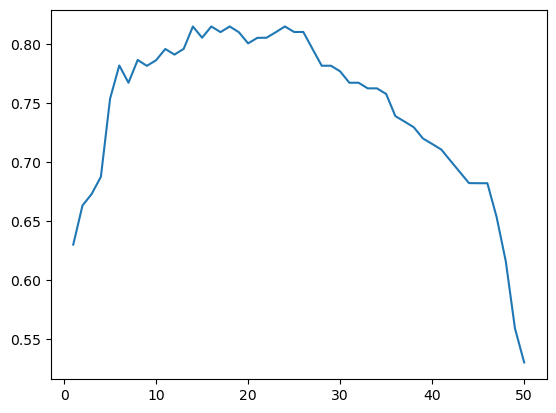

In [131]:
import pandas as pd
import pandas as pd
df_accCV = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df_accCV.avg_score.plot()

class grid_search_results():
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.df_acc_CV_test = pd.DataFrame(columns=['avg_scores', 'test_scores', 'best_params'])

    def iterate_results(self, df_accCV):
        if self.df_accCV.avg_scores.empty:
            self.df_accCV.avg_scores = df_accCV.avg_score
            self.df_accCV.test_scores = df_accCV.test_score
        else:
            # Iterate the grid_search results if the validated score is higher than the previous one
            for idx in range(len(df_accCV.avg_score)):
                if df_accCV.avg_score[idx] > self.df_accCV.avg_scores[idx]:
                    self.df_accCV.avg_scores[idx] = df_accCV.avg_score[idx]
                    self.df_accCV.test_scores[idx] = df_accCV.test_score[idx]


# Create a dictionary with the data
ex_data = {'Name': ['John', 'Emma', 'Michael', 'Sophia'],
        'Age': [25, 28, 32, 30],
        'City': ['New York', 'London', 'Paris', 'Tokyo']}

# Create the dataframe
df = pd.DataFrame(ex_data)

# Print the dataframe
print(df)

print(df.Age.iloc[0])
type(df.Age.iloc[0])

print(type(df.Age))

## Different feature types input to LDA/SVM

In [ ]:
from Model_ML import Model_ML
# Extract the columns that contain the specific feature type
feature_names = data['train'].columns.values
unique_types_feat = [col.split('_')[0] for col in feature_names]
unique_types_feat = np.unique(unique_types_feat)
print(unique_types_feat)  
#   >> ['Coh' 'Corr' 'DFA' 'HFD100' 'ID' 'KFD' 'LogBP' 'PLI' 'PLV' 
#       'PLZC' 'RP-I' 'RP-II' 'RP-III' 'RatioPower' 'SampEn-I' 'SampEn-II' 'Task']
unique_types_feat = np.delete(unique_types_feat, np.where(unique_types_feat == 'ID'))
unique_types_feat = np.delete(unique_types_feat, np.where(unique_types_feat == 'Task'))
print(unique_types_feat)    

specific_features = {}
for featur_type in unique_types_feat:
    for key, value in data.items():
        # Detect if the key is 'Info' and skip it
        if key != 'Info':
            # Drop the 'ID' and 'Task' columns if they exist
            if 'ID' in data[key].columns:
                data[key].drop('ID', axis=1, inplace=True)
            if 'Task' in data[key].columns:
                data[key].drop('Task', axis=1, inplace=True)  
            specific_features[key] = data[key].loc[:, [col for col in feature_names if (featur_type == col.split('_')[0])]]
        else:
            specific_features[key] = data[key]

    model_ML = Model_ML(specific_features, info, 
                        folder_path_LDA = f'../Results/Classification/LDA/10Fold_test/{featur_type}/',
                        folder_path_SVM= f'../Results/Classification/SVM/10Fold_test/{featur_type}/')
    
    print(f'Feature type: {featur_type}')
    print('LDA:')
    model_ML.CV_LDA()
    print('SVM:')
    model_ML.CV_SVM()



['Coh' 'Corr' 'DFA' 'HFD100' 'KFD' 'LogBP' 'PLI' 'PLV' 'PLZC' 'RP-I'
 'RP-II' 'RP-III' 'RatioPower' 'SampEn-I' 'SampEn-II']
['Coh' 'Corr' 'DFA' 'HFD100' 'KFD' 'LogBP' 'PLI' 'PLV' 'PLZC' 'RP-I'
 'RP-II' 'RP-III' 'RatioPower' 'SampEn-I' 'SampEn-II']
Feature type: Coh
LDA:


100%|██████████| 105/105 [00:02<00:00, 39.98it/s]


SVM:


100%|██████████| 105/105 [16:06<00:00,  9.20s/it]


Feature type: Corr
LDA:


100%|██████████| 105/105 [00:01<00:00, 68.04it/s]


SVM:


100%|██████████| 105/105 [38:45<00:00, 22.15s/it]


Feature type: DFA
LDA:


100%|██████████| 105/105 [00:01<00:00, 74.68it/s]


SVM:


100%|██████████| 105/105 [13:05<00:00,  7.48s/it]


Feature type: HFD100
LDA:


100%|██████████| 105/105 [00:01<00:00, 72.51it/s]


SVM:


100%|██████████| 105/105 [04:19<00:00,  2.47s/it]


Feature type: KFD
LDA:


100%|██████████| 105/105 [00:01<00:00, 75.64it/s]


SVM:


100%|██████████| 105/105 [02:20<00:00,  1.34s/it]


Feature type: LogBP
LDA:


100%|██████████| 105/105 [00:01<00:00, 67.11it/s]


SVM:


100%|██████████| 105/105 [9:18:58<00:00, 319.41s/it] 


Feature type: PLI
LDA:


100%|██████████| 105/105 [00:01<00:00, 59.09it/s]


SVM:


100%|██████████| 105/105 [07:21<00:00,  4.21s/it]


Feature type: PLV
LDA:


100%|██████████| 105/105 [00:01<00:00, 61.97it/s]


SVM:


100%|██████████| 105/105 [22:50<00:00, 13.05s/it]


Feature type: PLZC
LDA:


100%|██████████| 105/105 [00:01<00:00, 73.39it/s]


SVM:


100%|██████████| 105/105 [02:53<00:00,  1.66s/it]


Feature type: RP-I
LDA:


100%|██████████| 105/105 [00:03<00:00, 28.64it/s]


SVM:


100%|██████████| 105/105 [1:10:56<00:00, 40.54s/it]


Feature type: RP-II
LDA:


100%|██████████| 105/105 [00:01<00:00, 64.34it/s]


SVM:


100%|██████████| 105/105 [38:05<00:00, 21.77s/it]


Feature type: RP-III
LDA:


100%|██████████| 105/105 [00:01<00:00, 64.34it/s]


SVM:


100%|██████████| 105/105 [17:11:25<00:00, 589.39s/it]   


Feature type: RatioPower
LDA:


100%|██████████| 105/105 [00:03<00:00, 33.29it/s]


SVM:


100%|██████████| 105/105 [17:25<00:00,  9.96s/it]


Feature type: SampEn-I
LDA:


100%|██████████| 105/105 [00:02<00:00, 39.72it/s]


SVM:


100%|██████████| 105/105 [13:42<00:00,  7.83s/it]


Feature type: SampEn-II
LDA:


100%|██████████| 105/105 [00:02<00:00, 38.96it/s]


SVM:


100%|██████████| 105/105 [14:42<00:00,  8.40s/it]


# Regression part

In [ ]:
# organizing - scores of different mental scales
scales_df = {}
scales_names = ['GDS_total', 'MMSE_total', 'IADL_total', 'ADL_total', 'CDR_total', 'MoCA_total']
for key, value in info.items():
    if key != 'Info':
        scales_df[key] = value[scales_names]
    else:
        scales_df[key] = value

scales_train_valid = pd.concat([scales_df['train'], scales_df['valid']], axis=0)
scales_test = scales_df['test']

### Decision values VS. Scales

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import pandas as pd
from tqdm import tqdm, trange
from joblib import dump, load
from scipy import stats

# Create the SVM classifier
svr = SVR()
linR = LinearRegression()

# Define the parameter grid for GridSearchCV
gamma_range = np.linspace(-100,100,21) #-100,-95,...,95,100
gamma_range = 1.05**gamma_range # 1.05^-100,1.05^-95,...,1.05^95,1.05^100
gamma_range = 1 / 2*(np.square(gamma_range))  # gamma = 1 / (2*sigma)^2, based on the SVC documentation
gamma_range = gamma_range.tolist()
C_range = [1,10,100,1000]
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': ['rbf']}
param_grid_linR = {'fit_intercept': [True]}


max_dim = int(label_train_valid.shape[0]/2)  # Define the maximum number of features

# Specify the folder paths
folder_path = '../Results/Classification/SVM/AOFI_smallerGrid_10Fold/'
model_folder_path = os.path.join(folder_path, 'Models/')
fisher_idx_path = os.path.join(folder_path, 'fisher_idx_series.csv') # Specify the file path
fisher_idx = pd.read_csv(fisher_idx_path)['fisher_idx'].values # Load the fisher_idx from the file

for scale_name, scale in scales_train_valid.items():
    print(scale_name+':')
    _scale_train_valid = scale.values
    _scale_test = scales_test[scale_name].values

    df_scoreCV =list()
    for idx_AOFI in tqdm(range(1, max_dim+1)):
        model_file = os.path.join(model_folder_path, 'best_model_'+str(idx_AOFI)+'.joblib') # Specify the file path
        model = load(model_file) # Load the model from the file
        decision_values = model.decision_function(data_train_valid[:, fisher_idx[:idx_AOFI]]) # Get the decision values

        data_CV = decision_values.reshape(-1, 1) # Reshape the decision values to a 2D array

        # Create the GridSearchCV object
        # print("grid_search start")
        grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=10, n_jobs=10)
        # Train the model with gridsearchCV
        grid_search.fit(data_CV, _scale_train_valid)
        # print("grid_search end")

        # Get the best parameters and best score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        # print("best_score:",best_score)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Get the decision values of test data
        decision_values_test = model.decision_function(data_test[:, fisher_idx[:idx_AOFI]]).reshape(-1, 1)
        test_score = best_model.score(decision_values_test, _scale_test) # Get the test score af regression
        correlation_test = stats.pearsonr(decision_values_test.flatten(), _scale_test.flatten()) # Get the correlation coefficient of test data VS scale

        # Combine the decision values of train, valid and test data
        decision_values_all = np.concatenate([data_CV, decision_values_test], axis=0)
        _scale_all = np.concatenate([_scale_train_valid, _scale_test], axis=0)

        # Append the loop index and scoreCV to the dataframe
        df_scoreCV.append({'#features': idx_AOFI, 'best_CVscore': best_score, 'best_params': best_params, 'test_score': test_score, 
                           'correlation_coef_all':stats.pearsonr(decision_values_all.flatten(), _scale_all.flatten())[0],
                           'p-value_all':stats.pearsonr(decision_values_all.flatten(), _scale_all.flatten())[1],
                           'correlation_coef_train':stats.pearsonr(data_CV.flatten(), _scale_train_valid.flatten())[0],
                           'p-value_train':stats.pearsonr(data_CV.flatten(), _scale_train_valid.flatten())[1],
                           'correlation_coef_test':correlation_test[0],
                           'p-value_test':correlation_test[1]})
        
        
    # Save the dataframe to csv
    df_scoreCV = pd.DataFrame(df_scoreCV) # Convert the list to a dataframe
    folder_decisionValue_vs_scale = os.path.join(folder_path, 'decisionValue_vs_scale/rbf_SVR/', scale_name) # Specify the folder path
    if not os.path.exists(folder_decisionValue_vs_scale):    os.makedirs(folder_decisionValue_vs_scale)
    df_scoreCV.to_csv(os.path.join(folder_decisionValue_vs_scale, 'df_scoreCV.csv'), index=False)

In [ ]:
# Abandon
# feature selction for regression using pearson's correlation - filter based

# select the specific scale for the regression
scale_idx = 1 #'GDS_total','MMSE_total','IADL_total', 'ADL_total', 'CDR_total', 'MoCA_total'
_scale_train_valid = scales_train_valid.iloc[:, scale_idx]
_scale_test = scales_test.iloc[:, scale_idx]

print(data_train_valid.shape, scales_train_valid.shape)
pearson_scores = f_selection.pearson_coef(data_train_valid, _scale_train_valid)
pearson_idx = np.argsort(pearson_scores)[::-1] # sort in descending order

### Feature configuration VS. Scales

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import pandas as pd
from tqdm import tqdm, trange
from joblib import dump, load

# Create the SVM classifier
svr = SVR()
linR = LinearRegression()

# Define the parameter grid for GridSearchCV
gamma_range = np.linspace(-100,100,21) #-100,-95,...,95,100
gamma_range = 1.05**gamma_range # 1.05^-100,1.05^-95,...,1.05^95,1.05^100
gamma_range = 1 / 2*(np.square(gamma_range))  # gamma = 1 / (2*sigma)^2, based on the SVC documentation
gamma_range = gamma_range.tolist()
C_range = [1, 100,  1000]
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': ['linear','rbf']}
param_grid_linR = {'fit_intercept': [True]}


max_dim = int(label_train_valid.shape[0]/2)  # Define the maximum number of features
for scale_name, scale in scales_train_valid.items():
    print(scale_name+':')
    _scale_train_valid = scale
    _scale_test = scales_test[scale_name]

    # Feature selection - filter_based - pearson's correlation
    pearson_scores = f_selection.pearson_coef(data_train_valid, _scale_train_valid)
    pearson_idx = np.argsort(pearson_scores)[::-1] # sort in descending order

    # Specify the folder path
    folder_path = f'../Results/Regression/SVR/AOFI_10Fold/{scale_name}/'
    # Create the folder if it does not exist
    if not os.path.exists(folder_path):    os.makedirs(folder_path)

    df_scoreCV =list()
    for idx_AOFI in tqdm(range(1, max_dim + 1)):
        data_CV = data_train_valid[:, pearson_idx[:idx_AOFI]]
        
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=10, n_jobs=10)

        # Train the model with gridsearchCV
        grid_search.fit(data_CV, _scale_train_valid)

        # Get the best parameters and best score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Get the best model
        best_model = grid_search.best_estimator_
        test_score = best_model.score(data_test[:, pearson_idx[:idx_AOFI]], _scale_test)
        
        # Append the loop index and accCV to the dataframe
        df_scoreCV.append({'#features': idx_AOFI, 'best_CVscore': best_score, 'best_params': best_params, 'test_score': test_score})

        # Save the best model to a file
        model_folder = os.path.join(folder_path, 'Models/')
        if not os.path.exists(model_folder):    os.makedirs(model_folder)
        model_file = os.path.join(model_folder, 'best_model_'+str(idx_AOFI)+'.joblib')
        dump(best_model, model_file)
        pd.Series(pearson_idx[:idx_AOFI]).to_csv(model_file+'_features_idx.csv', index=False)  # Save the best features index to a file

    # Save the dataframe to csv
    df_scoreCV = pd.DataFrame(df_scoreCV) # Convert the list to a dataframe
    df_scoreCV.to_csv(os.path.join(folder_path, 'df_scoreCV.csv'), index=False)

    # Create a dictionary with 'fisher_idx' and 'feature_type' as keys
    pearson_idx_DF = {'pearson_idx': pearson_idx, 'feature_type': data['train'].columns[pearson_idx]}
    pearson_idx_DF = pd.DataFrame(pearson_idx_DF) # Convert the dictionary to a DataFrame
    pearson_idx_DF.to_csv(os.path.join(folder_path, 'fpearson_idx_series.csv'), index=False) # Save the DataFrame to a .csv file

# Multiple output

### model class

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
from keras import backend as K
import time
import os
import numpy as np
from sklearn.metrics import classification_report, f1_score, accuracy_score, mean_absolute_error, r2_score


# Ref: https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/
# Ref: https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/
# Don't know why, but when setting the loss function, follow the following order: regression, classification
class Model_2outputs():
    def __init__(self,
                 input_dim,
                 n_classes,
                 optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                 lr=0.000001,
                 model_name='Model_2outputs',
                 epochs=100,
                 batch_size=32,
                 log_path='Models/logs',
                 loss = ['mse', 'sparse_categorical_crossentropy'],
                 **kwargs):
        self.input_dim = input_dim
        self.n_classes = n_classes
        self.optimizer = optimizer
        # self.optimizer.lr = lr
        self.model_name = model_name
        self.epochs = epochs
        self.batch_size = batch_size
        self.log_path = log_path
        self.loss = loss

        # use **kwargs to set the new value of below args.
        self.f1_average = 'binary' if self.n_classes == 2 else 'macro'
        self.nNeurons_common = 64
        self.nNeurons_net1 = [64,32]
        self.nNeurons_net2 = [64,32]
        self.dropout_rate = 0.5
        self.norm_rate = 0.25
        self.monitor = 'val_loss' # save_best_only based on this monitor

        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])

    def build(self):
        input_layer = Input(shape=(self.input_dim,))

        common_layer = Dense(self.nNeurons_common, activation='relu')(input_layer)
        # common_layer = Dense(20, activation='relu', kernel_initializer='he_normal')(input_layer)
        # common_layer = Dense(10, activation='relu', kernel_initializer='he_normal')(common_layer)
    
        # sub-network 1  for classification
        sub_net1 = Dense(self.nNeurons_net1[0], activation='relu')(common_layer)
        sub_net1 = Dense(self.nNeurons_net1[1], activation='relu')(sub_net1)
        sub_net1 = Dropout(self.dropout_rate)(sub_net1)
        sub_net1_output = Dense(self.n_classes, activation='softmax', name='output_classification')(sub_net1)
        # sub_net1_output = Dense(self.n_classes, activation='softmax')(common_layer) #test open source's structure from ref

        # sub-network 2  for regrssion
        sub_net2 = Dense(self.nNeurons_net2[0], activation='relu')(common_layer)
        sub_net2 = Dense(self.nNeurons_net2[0], activation='relu')(sub_net2)
        sub_net2 = Dropout(self.dropout_rate)(sub_net2)
        sub_net2_output = Dense(1, activation='linear', name='output_regression')(sub_net2)
        # sub_net2_output = Dense(1, activation='linear')(common_layer) #test open source's structure from ref

        # Combine both sub-network outputs
        combined_output = [sub_net2_output, sub_net1_output]

        # Define the model with input and combined output
        model = Model(inputs=input_layer, outputs=combined_output)
        
        # Compile the model
        # Don't know why, but when setting the loss function, follow the following order: regression, classification
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics={'output_classification': 'accuracy', 'output_regression': self.coeff_determination})

        # plot the model
        file_path = self.log_path + '/' + self.model_name + '/' + self.model_name + '.h5'
        plot_model(model, to_file=self.log_path + '/model.png', show_shapes=True)

        # Print model summary
        model.summary()
        
        self.model = model
        return model

    def fit(self, X_train,  y_train_reg, y_train_cat, X_val, y_val_cat, y_val_reg):
        # Define the callbacks
        file_path = self.log_path + '/' + self.model_name + '/' + self.model_name + '.h5'
        if not os.path.exists(self.log_path + '/' + self.model_name):
            os.makedirs(self.log_path + '/' + self.model_name)
        checkpointer = ModelCheckpoint(monitor=self.monitor, filepath=file_path, 
                                       verbose=1, save_best_only=True, save_weights_only=True)
        
        model = self.build()
        history = model.fit(X_train,[y_train_reg, y_train_cat],
                            epochs=self.epochs, batch_size=self.batch_size,
                            validation_data=(X_val, [y_val_cat, y_val_reg]), verbose=1,
                            callbacks=[checkpointer])
        
        return history
    
    def score(self, X_test, y_test_reg, y_test_cat):
        model = self.build() # Build the model
        model.load_weights(self.log_path + '/' + self.model_name + '/' + self.model_name + '.h5') # Load the best model
        model.compile(optimizer=self.optimizer, loss=self.loss) # Compile the model

        start = time.time()  # Record the start time
        [y_pred_reg, y_pred_cat] = model.predict(X_test) # Predict the test data
        end = time.time() # Record the end time

        # performance evaluation of classification(category)
        y_pred_cat = np.argmax(y_pred_cat, axis=-1).astype(int) # Get the predicted category
        acc = accuracy_score(y_test_cat, y_pred_cat)
        print('Accuracy: %.3f' % acc)

        # performance evaluation of regression
        print(y_test_reg.shape, y_pred_reg.shape)
        score = r2_score(y_test_reg, y_pred_reg) # Calculate the mean absolute error
        print('r2_score: %.3f' % score)
       
        loss = model.evaluate(x=X_test, y=[y_test_reg, y_test_cat], batch_size=self.batch_size)

        evaluation = {'loss': loss, 
                      'accuracy': acc,
                      'r2_score': score, 
                      'prediction_time': end-start}
        
        Y = {'y_true': [y_test_cat, y_test_reg], 
             'y_pred': [y_pred_cat, y_pred_reg]}
        return Y, evaluation
    
    def coeff_determination(self, y_true, y_pred):
        SS_res =  K.sum(K.square( y_true-y_pred ))
        SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
        return ( 1 - SS_res/(SS_tot + K.epsilon()) )

### examine

In [ ]:
# Assuming you have the following variables:
# train_features, train_targets_reg, train_targets_cat
# val_features, val_targets_reg, val_targets_cat
# test_features, test_targets_reg, test_targets_cat

# Define the scale to be used for regression
scale_name = 'MMSE_total'

# Convert the data to numpy arrays
X_train = np.array(data_ndarrays['train'])
y_train_reg = np.array(scales_df['train'][scale_name])
y_train_cat = np.array(label_ndarrays_CInonCI['train'])

X_val = np.array(data_ndarrays['valid'])
y_val_reg = np.array(scales_df['valid'][scale_name])
y_val_cat = np.array(label_ndarrays_CInonCI['valid'])

X_test = np.array(data_ndarrays['test'])
y_test_reg = np.array(scales_df['test'][scale_name])
y_test_cat = np.array(label_ndarrays_CInonCI['test'])

# Normalize the data if needed
# You can use sklearn's StandardScaler or MinMaxScaler for normalization

# Print the shapes of the data to verify
print("X_train shape:", X_train.shape)
print("y_train_reg shape:", y_train_reg.shape)
print("y_train_cat shape:", y_train_cat.shape)

print("X_val shape:", X_val.shape)
print("y_val_reg shape:", y_val_reg.shape)
print("y_val_cat shape:", y_val_cat.shape)

print("X_test shape:", X_test.shape)
print("y_test_reg shape:", y_test_reg.shape)
print("y_test_cat shape:", y_test_cat.shape)

In [ ]:
from numpy import unique
from numpy import argmax
from pandas import read_csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

n_features = X_train.shape[1]  # Define the number of features
n_class = len(unique(y_train_cat))  # Define the number of classes

# define model
model_2outputs = Model_2outputs(n_features, n_class, epochs=500, batch_size=10)

history=model_2outputs.fit(X_train, y_train_reg, y_train_cat, X_val, y_val_reg, y_val_cat)

In [ ]:
print('validation')
model_2outputs.score(X_val, y_val_reg, y_val_cat)

In [ ]:
print('test')
model_2outputs.score(X_test, y_test_reg, y_test_cat)